In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reto 1

Estás jugando a un juego de dados con un dado estándar de seis caras. En cada turno, tiras el dado una vez. Responde a las siguientes preguntas:

- a) ¿Cuál es la probabilidad de que saques un 3?
- b) ¿Cuál es la probabilidad de que saques un número par?
- c) Si tiras el dado dos veces, ¿cuál es la probabilidad de que saques dos números iguales?
- d) Si tiras el dado dos veces, ¿cuál es la probabilidad de que la suma de los números sea 7?
- e) Si tiras el dado tres veces, ¿cuál es la probabilidad de que saques al menos un 6?

No hace falta que hagas un programa para resolverlo, con escribir las operaciones vale.

In [2]:
#a) ¿Cuál es la probabilidad de que saques un 3?
caras = list(range(1,7))
casos_posibles = len(caras)
prob_tres = 1/casos_posibles

#b) ¿Cuál es la probabilidad de que saques un número par?
def par(x):
    y = []    
    for xi in x:
        if xi%2==0:
            y.append(xi)
    return y

prob_par = len(par(caras))/casos_posibles

#c) Si tiras el dado dos veces, ¿cuál es la probabilidad de que saques dos números iguales?
#Al ser sucesos independientes, P(A∩B) = P(A) · P(B):
prob_iguales = (1/casos_posibles) * (1/casos_posibles)

#d) Si tiras el dado dos veces, ¿cuál es la probabilidad de que la suma de los números sea 7?
dos_caras = ((1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(2,1),(2,2),(2,3),(2,4),(2,5),(2,6),(3,1),(3,2),(3,3),(3,4),(3,5),(3,6),(4,1),(4,2),(4,3),(4,4),(4,5),(4,6),(5,1),(5,2),(5,3),(5,4),(5,5),(5,6),(6,1),(6,2),(6,3),(6,4),(6,5),(6,6))
def suma_7(x):
    y = []    
    for xi in x:
        if sum(xi)==7:
            y.append(xi)
    return len(y)
prob_suma_7 = suma_7(dos_caras)/len(dos_caras)

#e) Si tiras el dado tres veces, ¿cuál es la probabilidad de que saques al menos un 6?
# Seria el caso de P(AU(BUC)) = P(A) + P(B) + P(C), donde P(A) = P(B) = P(C), por tanto:
prob_seis = 1/casos_posibles
prob_al_menos_un_seis = prob_seis * 3


### Reto 2

Vamos a realizar una simulación sencilla. El propósito va a ser estimar las probabilidades de que ocurrar algún suceso. Vamos a suponer que tenemos por un lado el número de la carta (1-10) y el palo (A, B, C, D).

Mediante una simulación de 10000 intentos, calcular las probabilidades de que ocurra lo siguiente:
- Sacar un 4
- Sacando dos cartas, que éstas sumen 10 (la primera carta se devuelve al mazo).
- La probabilidad de sacar la carta 5A
- La probabilidad de que la segunda carta sea menor que la primera
    
Utilizar la función np.random.choice.

In [3]:
cartas = [str(i) + palo for i in range(1, 11) for palo in 'ABCD']

Sacar un 4

In [4]:
simulaciones = 10000
resultados = list(range(1,11))

def sacar_4():
    contador_favorables = 0
    for _ in range(simulaciones):
        lanzamientos = np.random.choice(resultados)
        if np.all(lanzamientos == 4):
            contador_favorables += 1
    return contador_favorables

prob_cuatro = sacar_4() / simulaciones
prob_cuatro

0.1038

Sacando dos cartas, que éstas sumen 10 (la primera carta se devuelve al mazo).


In [5]:
simulaciones = 10000
resultados = list(range(1,11))

def prob_10(x):
    contador_favorables = 0
    for _ in range(x):
        lanzamientos = np.random.choice(resultados,2)
        if sum(lanzamientos)==10:
            contador_favorables += 1            
        return contador_favorables
        
prob_suma_diez = prob_10(simulaciones) / simulaciones
prob_suma_diez

0.0

La probabilidad de sacar la carta 5A


In [6]:
simulaciones = 10000
resultados = len(cartas)

def carta_5A():
    contador_favorables = 0
    for _ in range(simulaciones):
        lanzamientos = np.random.choice(cartas)
        if lanzamientos == '5A':
            contador_favorables += 1
    return contador_favorables

prob_5A = carta_5A() / simulaciones
prob_5A

0.0266

La probabilidad de que la segunda carta sea menor que la primera

In [7]:
simulaciones = 10000
resultados = list(range(1,11))


def menor():
    contador_favorables = 0
    for _ in range(simulaciones):
        lanzamientos = np.random.choice(resultados,2)
        if lanzamientos[1] < lanzamientos[0]:
            contador_favorables += 1
    return contador_favorables

prob_menor = menor() / simulaciones
prob_menor

0.4507

### Reto 3

Lee acerca de la paradoja del cumpleaños (https://es.wikipedia.org/wiki/Paradoja_del_cumplea%C3%B1os) y crea un programa para, dado un numero de personas N, calcular la probabilidad de que haya dos personas que cumplen los años el mismo día mediante una simulacion.

Para ello:
- Crea una funcion que cree una lista de numeros aleatorios del 1 al 365 tantos como personas haya en la sala.
- Comprueba si en esa lista hay dos numeros repetidos. Eso significaria que hay dos personas que cumplen años el mismo dia.
- Repite este proceso 10.000 veces para cada N del 1 al 365 y obten la probabilidad para cada N
- Dibuja un grafico en el que el eje X sea el numero de personas y el eje Y la probabilidad de que dos personas cumplan años el mismo dia

Crea una funcion que cree una lista de numeros aleatorios del 1 al 365 tantos como personas haya en la sala.

In [8]:
def n_personas_sala(x):
    personas_sala = []
    for i in range(x+1):
        personas_sala.append(np.random.randint(1,366))     
    return personas_sala


Comprueba si en esa lista hay dos numeros repetidos. Eso significaria que hay dos personas que cumplen años el mismo dia.

In [9]:
def repetidos(x):
    repetidos = {i for i in x if x.count(i) > 1}
    return repetidos
    
personas = n_personas_sala(365)
num_repetidos = len(repetidos(personas))

Repite este proceso 10.000 veces para cada N del 1 al 365 y obten la probabilidad para cada N

In [10]:
def cumple_repetido(cantidad_personas):
    n_simulaciones = 100
    contador_favorables = 0
    for _ in range(n_simulaciones):
        personas = n_personas_sala(cantidad_personas)
        num_repetidos = repetidos(personas)
        if len(num_repetidos) >= 1:
            contador_favorables += 1
    return contador_favorables / n_simulaciones

prob_repetido = cumple_repetido(365)
prob_repetido

1.0

Dibuja un grafico en el que el eje X sea el numero de personas y el eje Y la probabilidad de que dos personas cumplan años el mismo dia

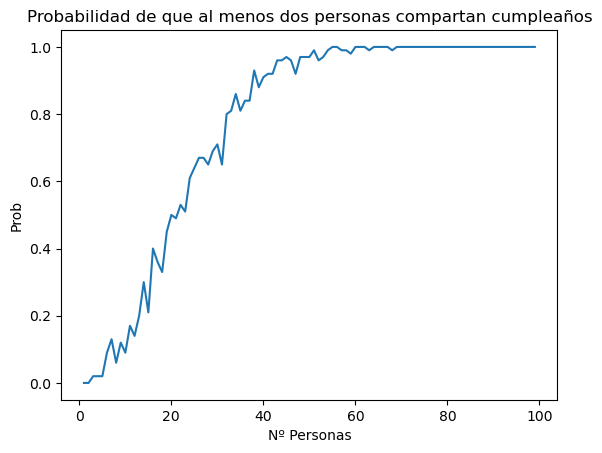

In [11]:
prob_cumple = []
for i in range(1,100):
    prob_cumple.append(cumple_repetido(i))

plt.xlabel("Nº Personas")
plt.ylabel("Prob")
plt.title("Probabilidad de que al menos dos personas compartan cumpleaños")
plt.plot(range(1,100),prob_cumple)

### Reto 4

Una pandemia mundial asola la Tierra y ya ha infectado a un 10% de la población. Un test de una enfermedad tiene un 90% de fiabilidad, es decir, si alguien está enfermo y se le aplica, dará positivo un 90% de las veces. Si alguien no está enfermo, dará negativo un 90% de las veces.

Suponiendo que nos hicieran un test aleatorio y diéramos positivo, ¿cuál sería la probabilidad de tener esa enfermedad?

Solucionar este problema mediante una simulación y mediante la Ley de Bayes.

Para las simulaciones hacer simulaciones para 10, 100, 500, 1000 y 10000 individuos y plotear cómo el valor estimado se parece cada vez más al valor calculado.

In [58]:
p_infectado = 0.1
p_sano = 1- p_infectado
p_positivo_si_infectado = 0.9
p_positivo_si_sano = 0.1
p_positivo = p_positivo_si_infectado * p_infectado + p_positivo_si_sano * p_sano

#Bayes:
p_infectado_si_positivo=(p_positivo_si_infectado*p_infectado)/p_positivo
p_infectado_si_positivo

0.5

Suponiendo que nos hicieran un test aleatorio y diéramos positivo, ¿cuál sería la probabilidad de tener esa enfermedad?
Solucionar este problema mediante una simulación y mediante la Ley de Bayes.

In [38]:
def p_infectado_si_positivo(simulaciones):
    positivos = 0
    enfermos = 0    
    for i in range(simulaciones):
        if random.random() < p_infectado:
            enfermos += 1
            if random.random() < p_positivo_si_infectado:
                positivos += 1
        else: 
            if random.random() < p_positivo_si_sano:
                positivos += 1            
    return enfermos / positivos

p_infectado_si_positivo(100000)

0.5529766222172627

Para las simulaciones hacer simulaciones para 10, 100, 500, 1000 y 10000 individuos y plotear cómo el valor estimado se parece cada vez más al valor calculado.

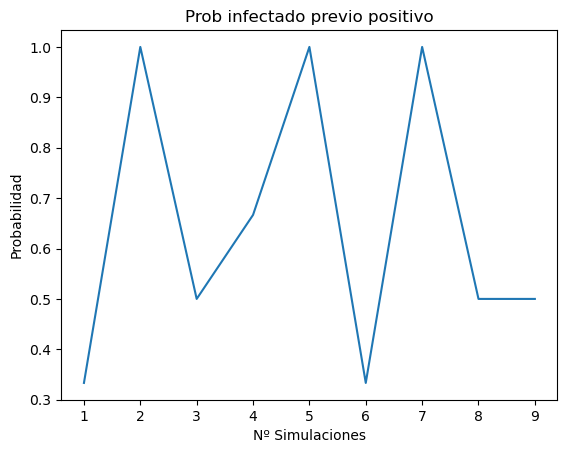

In [53]:
    
def dibujar_pandemia(simulaciones):
    prob_4 = []
    for i in range(1,simulaciones):
        prob_4.append(p_infectado_si_positivo(simulaciones))
    plt.xlabel('Nº Simulaciones')
    plt.ylabel('Probabilidad')
    plt.title('Prob infectado previo positivo')
    plt.plot(range(1,simulaciones),prob_4)
    
    
dibujar_pandemia(10)   

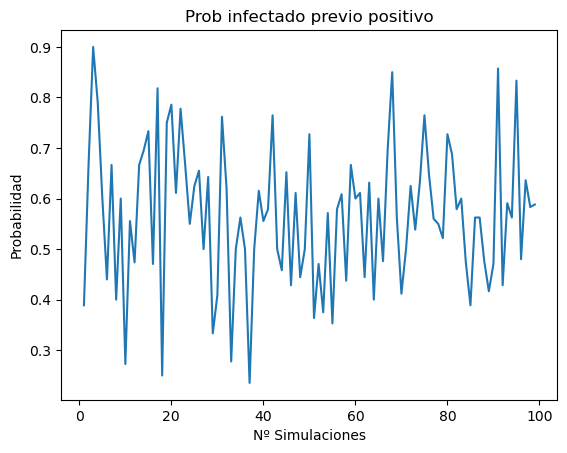

In [54]:
dibujar_pandemia(100)   

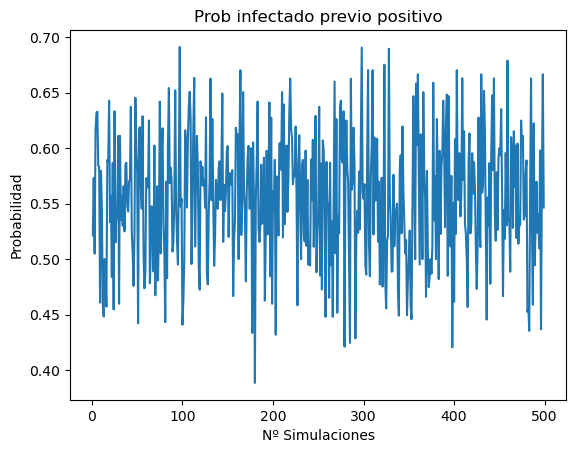

In [55]:
dibujar_pandemia(500)   

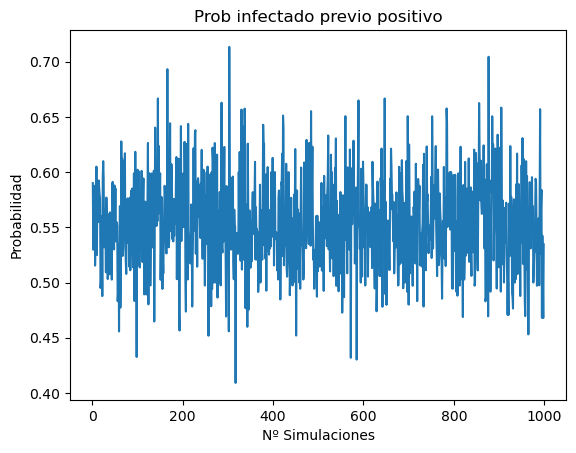

In [56]:
dibujar_pandemia(1000)   

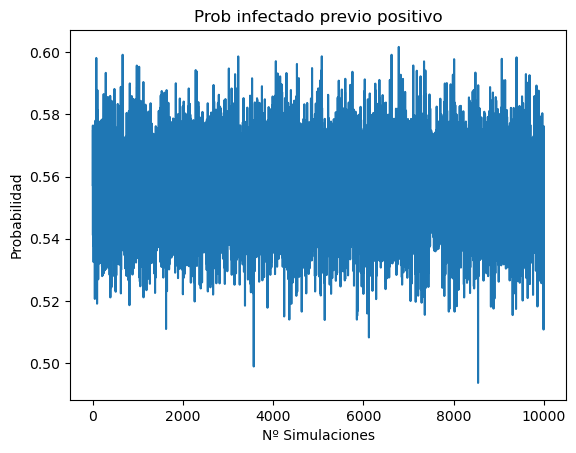

In [57]:
dibujar_pandemia(10000)   